In [2]:
import os
import pandas as pd
import numpy as np
import xarray as xr
import plotly.express as px
import matplotlib as plt 
from matplotlib import pyplot as plt
plt.ion()  # To trigger the interactive inline mode
%matplotlib inline 

from tabulate import tabulate
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

import cmocean

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

libarrow.so.800: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory
libarrow.so.800: cannot open shared object file: No such file or directory


In [2]:
df = pd.read_csv('Shark_Temp_Salt_Clean.csv')
df['year'] = pd.to_datetime(df['Date']).dt.to_period('Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88109 entries, 0 to 88108
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype        
---  ------       --------------  -----        
 0   Unnamed: 0   88109 non-null  int64        
 1   sex          88109 non-null  object       
 2   organismID   88109 non-null  object       
 3   year         88109 non-null  period[A-DEC]
 4   month        88109 non-null  int64        
 5   day          88109 non-null  int64        
 6   Date         88109 non-null  object       
 7   Latitude     88109 non-null  float64      
 8   Longitude    88109 non-null  float64      
 9   Temperature  88042 non-null  float64      
 10  Salinity     88042 non-null  float64      
dtypes: float64(4), int64(3), object(3), period[A-DEC](1)
memory usage: 7.4+ MB


In [3]:
Baseline_url = "https://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-2019-04.nc"
Hindcast_url = 'https://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/GBR4_H2p0_B3p1_Cq3R_Dhnd/daily-monthly/EREEFS_AIMS-CSIRO_GBR4_H2p0_B3p1_Cq3R_Dhnd_bgc_daily-monthly-2017-12.nc'
PreIndus_url = 'https://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/GBR4_H2p0_B3p1_Cq3P_Dhnd/daily-monthly/EREEFS_AIMS-CSIRO_GBR4_H2p0_B3p1_Cq3P_Dhnd_bgc_daily-monthly-2019-04.nc'


ds = xr.open_dataset(Hindcast_url)[['salt','temp']]
ds

<xarray.Dataset>
Dimensions:    (time: 31, k: 17, latitude: 723, longitude: 491)
Coordinates:
    zc         (k) float64 ...
  * time       (time) datetime64[ns] 2017-12-01T02:00:00 ... 2017-12-31T02:00:00
  * latitude   (latitude) float64 -28.7 -28.67 -28.64 ... -7.096 -7.066 -7.036
  * longitude  (longitude) float64 142.2 142.2 142.2 142.3 ... 156.8 156.8 156.9
Dimensions without coordinates: k
Data variables:
    salt       (time, k, latitude, longitude) float32 ...
    temp       (time, k, latitude, longitude) float32 ...
Attributes: (12/20)
    Conventions:                     CF-1.0
    NCO:                             netCDF Operators version 4.7.7 (Homepage...
    RunID:                           2
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:      2021-09-07T20:53:36+10:00
    aims_ncaggregate_datasetId:      products__ncaggregate__ereefs__GBR4_H2p0...
    ...                              ...
    paramfile:                       /short/et4/mmm599/gbr4_H2p0_B3p1_Cq3R//s...
    paramhead:                       eReefs 4 km grid. SOURCE Catchments with...
    technical_guide_link:            https://eatlas.org.au/pydio/public/aims-...
    technical_guide_publish_date:    2020-08-18
    title:                           eReefs AIMS-CSIRO GBR4 BioGeoChemical 3....
    DODS_EXTRA.Unlimited_Dimension:  time

In [4]:
meands = ds.isel(k=-1).mean(dim='time')

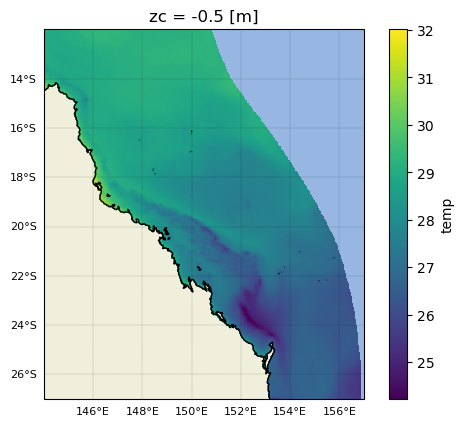

In [5]:
#create a map
ccrs.PlateCarree()

#extent 
extent = [157,144,-12,-27]

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
plt.savefig('map.png')
ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')

ax.coastlines()
ax.set_title('month')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.1, color='k', alpha=1, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

meands.temp.plot()

In [6]:
def getSweetSpots(meands,tempRange,saltRange):
    
    tempArray = meands.temp.values.copy()
    idsTemp = np.where(np.logical_and(tempArray>=tempRange[0],tempArray<=tempRange[1]))
    saltArray = meands.salt.values.copy()
    idsSalt = np.where(np.logical_and(saltArray>=saltRange[0],saltArray<saltRange[1]))

    tmpT = np.zeros(tempArray.shape)
    tmpT[idsTemp] = 1
    tmpS = np.zeros(tempArray.shape)
    tmpS[idsSalt] = 1
    tmp = tmpT+tmpS
    tmp[tmp<2] = 0
    tmp[tmp==0] = np.nan
    tmp[tmp==2] = 1
    meands['spots'] = (('latitude','longitude'),tmp)
    print('Number of good locations:',len(np.where(tmp==1)[0]))
    
    return meands

In [7]:
# Define your temperature range
tempRange = [23.8,26.]

# Define your salinity range
saltRange = [35.2,35.7]

sweet = getSweetSpots(meands,tempRange,saltRange)

Number of good locations: 8810


TypeError: Figure.savefig() missing 1 required positional argument: 'fname'

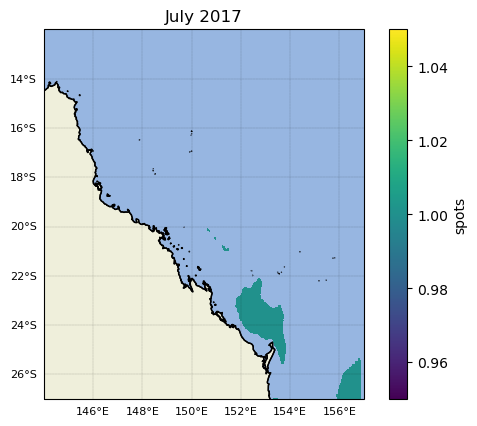

In [8]:
#create a map
ccrs.PlateCarree()

#extent 
extent = [157,144,-12,-27]

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
plt.savefig('map.png')
ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')

ax.coastlines()
ax.set_title('month')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.1, color='k', alpha=1, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

sweet.spots.plot(cmap = 'viridis')
plt.title('July 2017')
plt.savefig()

In [ ]:
#create a map
ccrs.PlateCarree()

#extent 
extent = [157,144,-12,-27]

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
plt.savefig('map.png')
ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')

ax.coastlines()
ax.set_title('month')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.1, color='k', alpha=1, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

sweet.temp.plot(cmap = 'plasma')

In [ ]:
#create a map
ccrs.PlateCarree()

#extent 
extent = [157,144,-12,-27]

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
plt.savefig('map.png')
ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')

ax.coastlines()
ax.set_title('month')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.1, color='k', alpha=1, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

sweet.salt.plot(vmin=35.2, cmap = 'plasma')

In [ ]:
import sys
from PIL import Image

images = [Image.open(x) for x in ['jan17.png', 'feb17.png', 'march17.png']]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

new_im.save()
new_im

In [5]:
#create data
my_frame = pd.DataFrame(data = [["Jan", 15029, 3247],
        ["Feb", 1679, 68],
        ["March", 4226, 667],
        ["April", 20694, 10030],
        ["May", 27075, 39286],
        ["June", 29317,54174],
        ["July", 17664,52727],
        ["Aug", 25839, 65792],
        ["Sept",36247,73090],
        ["Oct", 49291, 40932],
        ["Nov", 31032, 32807],
        ["Dec", 21703,8810]])

#define header names
col_names = ["2012", "2017"]

print(tabulate(my_frame, headers=col_names, tablefmt="fancy_grid", showindex="always", numalign="center"))


╒════╤═══════╤════════╤════════╕
│    │       │  2012  │  2017  │
╞════╪═══════╪════════╪════════╡
│ 0  │ Jan   │ 15029  │  3247  │
├────┼───────┼────────┼────────┤
│ 1  │ Feb   │  1679  │   68   │
├────┼───────┼────────┼────────┤
│ 2  │ March │  4226  │  667   │
├────┼───────┼────────┼────────┤
│ 3  │ April │ 20694  │ 10030  │
├────┼───────┼────────┼────────┤
│ 4  │ May   │ 27075  │ 39286  │
├────┼───────┼────────┼────────┤
│ 5  │ June  │ 29317  │ 54174  │
├────┼───────┼────────┼────────┤
│ 6  │ July  │ 17664  │ 52727  │
├────┼───────┼────────┼────────┤
│ 7  │ Aug   │ 25839  │ 65792  │
├────┼───────┼────────┼────────┤
│ 8  │ Sept  │ 36247  │ 73090  │
├────┼───────┼────────┼────────┤
│ 9  │ Oct   │ 49291  │ 40932  │
├────┼───────┼────────┼────────┤
│ 10 │ Nov   │ 31032  │ 32807  │
├────┼───────┼────────┼────────┤
│ 11 │ Dec   │ 21703  │  8810  │
╘════╧═══════╧════════╧════════╛


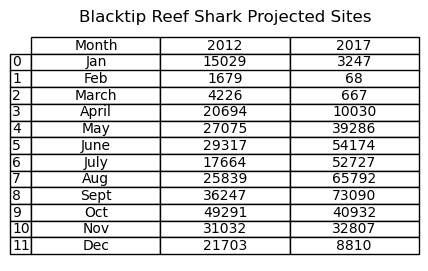

In [6]:
#my_frame Display pandas table

fig = plt.figure(figsize = (5, 3))
ax = fig.add_subplot(111)

col_names = ["2012", "2017"]

ax.table(cellText = my_frame.values,
          rowLabels = my_frame.index,
          colLabels = ['Month', '2012', '2017'] ,
          loc = "center",
        cellLoc='center',
      )
ax.set_title("Blacktip Reef Shark Projected Sites")

ax.axis("off");